In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.4.2     ✔ dplyr   0.7.4
✔ tidyr   0.7.2     ✔ stringr 1.2.0
✔ readr   1.1.1     ✔ forcats 0.2.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [3]:
all_sites <- read_tsv("../data/YRI.freq.gz", col_names=c("chrom", "pos", "f"))

Parsed with column specification:
cols(
  chrom = col_integer(),
  pos = col_integer(),
  f = col_double()
)


In [31]:
nrow(all_sites)

[1] 81161398

In [19]:
array_sites <- read_tsv("../data/bed//admixture_array_fixed.bed", col_names=c("chrom", "start", "end")) %>%
    mutate(chrom=as.integer(str_replace(chrom, "chr", "")))

Parsed with column specification:
cols(
  chrom = col_character(),
  start = col_integer(),
  end = col_integer()
)


In [24]:
nrow(array_sites)

[1] 483916

In [23]:
yri_sfs <- inner_join(all_sites, array_sites, by=c("chrom"="chrom", "pos"="end"))

In [26]:
nrow(yri_sfs)

[1] 326938

In [30]:
summary(1 - yri_sfs$f)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.5000  1.0000  1.0000  0.9969  1.0000  1.0000 

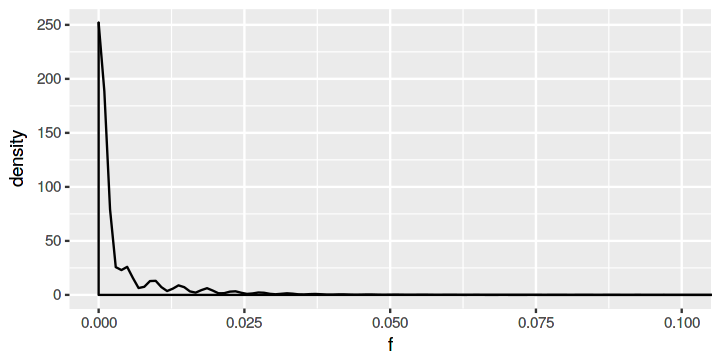

In [29]:
options(repr.plot.width=6, repr.plot.height=3, repr.plot.res=120)
ggplot(yri_sfs, aes(f)) + geom_density() + coord_cartesian(x=c(0, 0.1))